<a href="https://colab.research.google.com/github/ishika-mittal/Stock-Prices-Analytics-Dashboard/blob/main/Simple_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simple Moving Average

1. There simple objective to smoothen the fluctuation by determining an avergae price within the given time period.

2. They help analyse and predict the trend of the stock. A rising SMA-> uptrend, while a declining SMA-> downtrend.

3. You can also plot SMAs with two different time periods to identify crossover. An upward momentum is confirmed with a bullish crossover, which occurs when a short-term moving average crosses above a longer-term moving average. Conversely, downward momentum is confirmed with a bearish crossover, which occurs when a short-term moving average crosses below a longer-term moving average.

4. There is no fixed time period for calculating SMA. Shorter moving averages are typically used for short-term trading, while longer-term moving averages are more suited for long-term investors.

Detailed Explanation - https://www.investopedia.com/terms/m/movingaverage.asp

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Installing yfinance library for fetching historical stock data
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3MB 10.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=2b1d06797b3a23c8f1385b66e4af2e99a753a7dc9bfef84f41e51b9c5673e558
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#Function to get the stock data
def stock_data(stock, start_date, end_date):

    tickerSymbol = stock

    #get data on this ticker
    tickerData = yf.Ticker(tickerSymbol)

    #get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)

    return tickerDf

In [4]:
#Fetching a 1Y dataset for better representation

df = stock_data("ITC.BO", "2020-06-08", "2021-06-08")
df.reset_index(level="Date", inplace=True)
df.drop(columns = ['Dividends', 'Stock Splits'], inplace=True)

print(df.shape)
df.head()

(250, 6)


,Date,Open,High,Low,Close,Volume
0,2020-06-08,182.945035,184.074883,178.199672,178.742004,744734
1,2020-06-09,179.826649,186.289389,178.696801,179.510300,1341970
2,2020-06-10,180.052627,183.668142,179.284339,180.097824,1024793
3,2020-06-11,180.775730,181.905578,174.990912,175.894791,855456
4,2020-06-12,171.375387,176.482296,169.974373,175.352448,980250


In [5]:
#Creating a dataset with only Closing Price column and Date as index

data = df.sort_index(ascending=True,axis=0)
df1 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    df1["Date"][i]=data['Date'][i]
    df1["Close"][i]=data["Close"][i]

df1.index=df1.Date
df1.drop("Date",axis=1,inplace=True)
print(df1.shape)
df1.head()

(250, 1)


,Close
Date,
2020-06-08,178.742
2020-06-09,179.51
2020-06-10,180.098
2020-06-11,175.895
2020-06-12,175.352


In [6]:
#Defining the function

def MA(data, window_size):

  data1 = data
  data1 = pd.Series(data1["Close"])

  #Calculating Moving average for a given time period
  moving_avg = data1.rolling(window = window_size).mean()
  #Parsing the results as a new column in the existing data frame
  data["Moving_Avg"] = moving_avg

  return data

In [7]:
#Implementing the function
MA(df1,30)

#Note: First window_size values under Moving_avg as empty as they are used in inital calculation
df1.iloc[20:30,:]

,Close,Moving_Avg
Date,,
2020-07-06,189.843,NaN
2020-07-07,184.663,NaN
2020-07-08,186.516,NaN
2020-07-09,185.756,NaN
2020-07-10,184.663,NaN
2020-07-13,187.657,NaN
2020-07-14,186.279,NaN
2020-07-15,188.655,NaN
2020-07-16,184.235,NaN


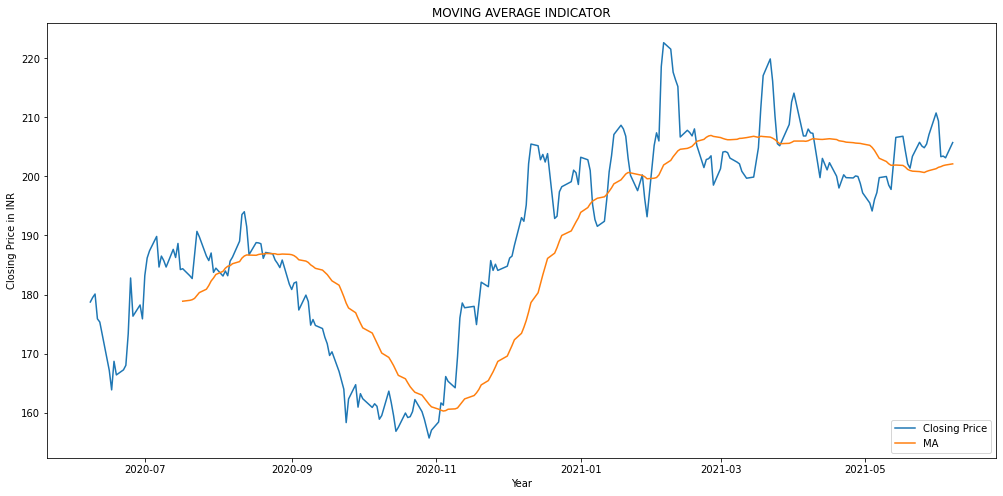

In [8]:
#Plotting Moving Average wrt to Closing Price

#Setting labels
plt.figure(figsize=(17,8))
plt.xlabel("Year")
plt.ylabel("Closing Price in INR")
plt.title("MOVING AVERAGE INDICATOR")

#Let's go
plt.plot(df1[['Close','Moving_Avg']])
plt.legend(["Closing Price", "MA"], loc ="lower right")
plt.show()